# Series and Dataframes
8.26.2021

Learning Goals:
* Understand what series and dataframes are.
* Know how to select items in a series.
* Know how to select columns of a dataframe.
* Know how to select data points of a dataframe using indices, labels, and conditions.


In [2]:
import pandas, seaborn

There are two basic data structures in analytics: series and dataframes.

Series are like columns and rows in Excel.

Dataframes are like the whole spreadsheet of Excel.

In [27]:
df = pandas.read_csv('../Datasets/iris.csv')

In [28]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [10]:
len(df), type(df)

(150, pandas.core.frame.DataFrame)

Can we tell the species apart?   How do we visualize this dataset?

When we visualize, what we often want to do is:

1. Discovering relationships between two variables.
2. Discovering how a variable distributes values.

This dataset has 5 variables.  One of them is the "target" variable: "Species".  This is a discrete categorical variable.

The other 4 variables are numerical.

To discover relationships between two numerical variables, we often use scatterplots.

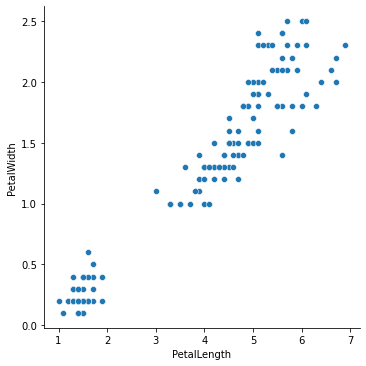

In [5]:
seaborn.relplot(data=df, x='PetalLength', y='PetalWidth')

There are two clusters.

There is a linear relationship between the two variables.  (Positive correlation).

We'll species into this plot.

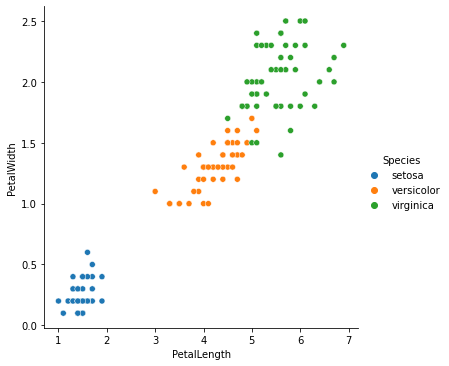

In [6]:
seaborn.relplot(data=df, x='PetalLength', y='PetalWidth', hue='Species')

It should be easy to differentate setosa from the other species.

# Selecting data from a dataframe

Select all setosa data with petal length less that average.

Select all data with petal width greater than average.

In [30]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [31]:
avg_setosa_pl = df.loc[df['Species'] == 'setosa', 'PetalLength'].mean()
print(avg_setosa_pl)

filt = (df['Species'] == 'setosa') & (df['PetalLength'] < avg_setosa_pl)
setosa_data = df.loc[filt]
display(setosa_data.head())

print("*"*100)

avg_setosa_pw = df.loc[df['Species'] == 'setosa', 'PetalWidth'].mean()
print(avg_setosa_pw)

filt = (df['Species'] == 'setosa') & (df['PetalWidth'] > avg_setosa_pw)
setosa_data = df.loc[filt]
display(setosa_data.head())


1.4620000000000002


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa


****************************************************************************************************
0.2459999999999999


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
15,5.7,4.4,1.5,0.4,setosa
16,5.4,3.9,1.3,0.4,setosa
17,5.1,3.5,1.4,0.3,setosa


# Data transformation

Compute centroids for each species.

Create a new columns, p_setosa, which is the probability of data points belonging to the species setosa.

Create two new columns: p_virginica and p_versicolor.

In [32]:
df_setosa = df.loc[df['Species'] == 'setosa']
setosa_centroid = df_setosa.mean()
print(setosa_centroid)

df_versicolor = df.loc[df['Species'] == 'versicolor']
versicolor_centroid = df_versicolor.mean()
print(versicolor_centroid)

df_virginica = df.loc[df['Species'] == 'virginica']
virginica_centroid = df_virginica.mean()
print(virginica_centroid)

SepalLength    5.006
SepalWidth     3.428
PetalLength    1.462
PetalWidth     0.246
dtype: float64
SepalLength    5.936
SepalWidth     2.770
PetalLength    4.260
PetalWidth     1.326
dtype: float64
SepalLength    6.588
SepalWidth     2.974
PetalLength    5.552
PetalWidth     2.026
dtype: float64


In [41]:
from scipy.spatial.distance import cosine

def prob(row, centroid):
    return 1 - cosine(row, centroid)

df_copy = df.drop(columns = ['Species'])
p_setosa = df_copy.apply(prob, centroid = setosa_centroid, axis = 'columns')
p_versicolor = df_copy.apply(prob, centroid = versicolor_centroid, axis = 'columns')
p_virginica = df_copy.apply(prob, centroid = virginica_centroid, axis = 'columns')

df_copy['p_setosa'] = p_setosa
df_copy['p_versicolor'] = p_versicolor
df_copy['p_virginica'] = p_virginica

df_copy

,SepalLength,SepalWidth,PetalLength,PetalWidth,p_setosa,p_versicolor,p_virginica
0,5.1,3.5,1.4,0.2,0.999872,0.918657,0.880882
1,4.9,3.0,1.4,0.2,0.998752,0.930281,0.893856
2,4.7,3.2,1.3,0.2,0.999915,0.920266,0.882782
3,4.6,3.1,1.5,0.2,0.999582,0.933672,0.898907
4,5.0,3.6,1.4,0.2,0.999622,0.915779,0.878059
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.896504,0.995791,0.998791
146,6.3,2.5,5.0,1.9,0.887961,0.995760,0.999165
147,6.5,3.0,5.2,2.0,0.898689,0.997246,0.999631
148,6.2,3.4,5.4,2.3,0.891226,0.992332,0.997619


# Predicting Species of New Data

Recreate class IrisData using dataframes.

Compute centroids of the three species.

Predict the species of a new data point using the "nearest centroid" method.

In [42]:
import numpy as np
import pandas as pd

data = pd.DataFrame(np.random.randn(1000, 4))
data.shape

(1000, 4)

In [46]:
out_filt = np.abs(data > 3)
out_filt[:10]

,0,1,2,3
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [50]:
data.loc[out_filt.any(axis =  'columns')]

,0,1,2,3
79,-0.829072,0.303527,3.078134,-1.510257
133,-0.204964,3.182234,-1.364248,-0.390507
226,1.172315,3.207316,-0.020430,0.710058
866,3.129701,1.278850,0.227223,0.262468
875,-0.959249,-0.817491,3.028791,0.196627
936,4.325976,-1.106099,0.984032,0.213120


In [63]:
chk_data = data[np.abs(data) > 3]
chk_data

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
995,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN


In [58]:
data[np.abs(data) > 3].describe()

,0,1,2,3
count,4.000000,2.000000,3.000000,1.000000
mean,0.336114,3.194775,0.907742,-3.652776
std,3.946923,0.017736,3.716579,NaN
min,-3.099773,3.182234,-3.383700,-3.652776
25%,-3.033529,3.188504,-0.177454,-3.652776
50%,0.059126,3.194775,3.028791,-3.652776
75%,3.428770,3.201045,3.053463,-3.652776
max,4.325976,3.207316,3.078134,-3.652776


In [61]:
chk_data[0].value_counts(dropna = False)

 NaN         996
 4.325976      1
-3.099773      1
 3.129701      1
-3.011448      1
Name: 0, dtype: int64

In [53]:
np.sign(data) * 3

,0,1,2,3
0,-3.0,3.0,-3.0,3.0
1,3.0,-3.0,-3.0,3.0
2,3.0,-3.0,3.0,3.0
3,3.0,-3.0,-3.0,3.0
4,-3.0,3.0,-3.0,3.0
...,...,...,...,...
995,3.0,3.0,-3.0,-3.0
996,-3.0,-3.0,3.0,3.0
997,3.0,3.0,3.0,-3.0
998,-3.0,3.0,-3.0,3.0


In [70]:
df = pd.DataFrame([[1, 2, 3], [3.5, 2, 2]])
df

,0,1,2
0,1.0,2,3
1,3.5,2,2


In [71]:
np.abs(df) > 3

,0,1,2
0,False,False,False
1,True,False,False


In [72]:
df[np.abs(df) > 3]

,0,1,2
0,NaN,NaN,NaN
1,3.5,NaN,NaN


In [76]:
d1 = np.sign(df) * 3
d1

,0,1,2
0,3.0,3,3
1,3.0,3,3


In [77]:
df[np.abs(df) > 3] = d1
df

,0,1,2
0,1.0,2,3
1,3.0,2,2
